# Projeto de Ciência de Dados

> Bloco com recuo



Milena Lucas dos Santos

## Revenda de veículos usados

* A empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo.
* Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional.
* Pra conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.

``` Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado. ```

### Imports necessários

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Seção de configuração

In [18]:
CONFIG = {}
CONFIG['boolTrue'] = True #ou 1
CONFIG['boolFalse'] = False # ou 0

### Carregando a base de dados

In [2]:
veiculos_usados = pd.read_csv('/content/cars_train.csv', sep='\t', encoding='utf_16')
veiculos_usados

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021.0,8150.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.289616
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020.0,17987.0,Automática,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.080497
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019.0,44742.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.648664
29582,208909739337040262669325459666578363437,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022.0,35376.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,68495.990693


### Informações sobre a base de dados

In [3]:
# informações sobre o conjunto de dados
veiculos_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

- **Verificando valores únicos e faltantes**

In [4]:
# Verificando valores únicos por coluna
veiculos_usados.nunique()

id                         29584
num_fotos                     14
marca                         40
modelo                       457
versao                      1916
ano_de_fabricacao             35
ano_modelo                    17
hodometro                  26004
cambio                         7
num_portas                     3
tipo                           7
blindado                       2
cor                            7
tipo_vendedor                  2
cidade_vendedor              575
estado_vendedor               25
anunciante                     4
entrega_delivery               2
troca                          2
elegivel_revisao               1
dono_aceita_troca              1
veiculo_único_dono             1
revisoes_concessionaria        1
ipva_pago                      1
veiculo_licenciado             1
garantia_de_fábrica            1
revisoes_dentro_agenda         1
veiculo_alienado               0
preco                      29584
dtype: int64

In [5]:
# Verificando valores vazios por coluna
veiculos_usados.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

### Resumo das informações do conjunto de dados

**Preço**
   - Quantitativo contínuo.
   - Atributo alvo.
   - Tipo float.
   - Número de casas decimais muito grande.

**Id, veículo aliendado e ano de fabricação**
   - ```Id```: Qualitativo, pode ser eliminado, pois não trás informações úteis para a análise.
   - ```Veículo alienado```: A coluna inteira está vazia, por isso pode ser eliminado.
   - ``Ano de fabricação``: Quantitativo discreto. Tipo inteiro. Pode ser eliminado. De acordo com a Fipe, o ano modelo do veículo que importa na hora da venda.

**Número de fotos, marca, modelo, versão, ano modelo, hodômetro**
   - ``Número de fotos``: Quantitativo discreto. Tipo float, mas é importante alterar para inteiro. Contém 14 valores distintos e 177 valores faltantes.
   - ``Marca``: Qualitativa. Tipo object. Contém 40 valores distintos.
   - ``Modelo``: Qualitativa. Tipo object. Contém 457 valores distintos.
   - ``Versão``: Qualitativa. Tipo object. Contém 1916 valores distintos.
   - ``Ano modelo``: Quantitativo discreto. Tipo float, porém é importante alterar o tipo para inteiro. Contém 17 valores distintos.
   - ``Hodômetro``: Quantitativo contínuo. Tipo float.
   
**Câmbio, número de portas, tipo, blindado, cor**
   - ``Câmbio``: Qualitativa. Tipo object. Contém 7 valores distintos.
   - ``Número de portas``: Quantitativo discreto. Tipo inteiro. Contém 3 valores distintos.
   - ``Tipo``: Qualitativo. Tipo object. Contém 7 valores distintos.
   - ``Blindado``: Qualitativo. Tipo object. Contém 2 valores distintos (N ou S). Pode ser alterado para o tipo bool.
   - ``Cor``: Qualitativo. Tipo object. Contém 7 valores distintos.

**Tipo vendedor, cidade vendedor, estado vendedor, anunciante**
   - ``Tipo vendedor``: Qualitativo. Tipo object. Contém 2 valores distintos.
   - ``Cidade vendedor``: Qualitativo. Tipo object. Contém 575 valores distintos.
   - ``Estado vendedor``: Qualitativo. Tipo object. Contém 25 valores distintos.
   - ``Anunciante``: Qualitativo. Tipo object. Contém 4 valores distintos.
   
**Entrega delivery, troca, elegível revisão**
   - ``Entrega delivery``: Qualitativo. Tipo bool.
   - ``Troca``: Qualitativo. Tipo bool.
   - ``Elegível revisão``: Qualitativo. Tipo bool. Somente False. Pode ser eliminado, pois possui um valor somente.

**Dono aceita troca, veículo único dono, revisões concessionária, ipva pago, veículo licenciado, garantia de fábrica, revisões dentro da agenda**
   - ``Dono aceita troca``: Qualitativo. Tipo object. Contém somente 1 valor (Aceita troca). 7662 valores faltantes.
   - ``Veículo único dono``: Qualitativo. Tipo object. Contém somente 1 valor (Único dono). 19161 valores faltantes.
   - ``Revisões concessionária``: Qualitativo. Tipo object. Contém somente 1 valor (Todas as revisões feitas pela concessionária). 20412 valores faltantes.
   - ``Ipva pago``: Qualitativo. Tipo object. Contém somente 1 valor (IPVA pago). 9925 valores faltantes.
   - ``Veículo licenciado``: Qualitativo. Tipo object. Contém somente 1 valor (Licenciado). 13678 valores faltantes.
   - ``Garantia de fábrica``: Qualitativo. Tipo object. Contém somente 1 valor (Garantia de fábrica). 25219 valores faltantes.
   - ``Revisões dentro da agenda``: Qualitativo. Tipo object. Contém somente 1 valor (Todas as revisões feitas pela agenda do carro). 23674 valores faltantes.

### Limpeza de dados

- Removendo colunas que não são relevantes para a análise dos dados: ``Id, Veículo alienado e Elegível revisão``.

In [6]:
veiculos_usados.drop(['id', 'veiculo_alienado', 'elegivel_revisao'], axis='columns', inplace=True)

In [7]:
veiculos_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29407 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  float64
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

- Valores faltantes: ``num_fotos, dono_aceita_troca, veiculo_único_dono, revisoes_concessionaria, ipva_pago, veiculo_licenciado, garantia_de_fábrica, revisoes_dentro_agenda``

``num_fotos``
    
   Como a coluna ``num_fotos`` representa o número de fotos no anúncio, para os valores faltantes será atribuído 0.

In [8]:
veiculos_usados['num_fotos'] = veiculos_usados['num_fotos'].fillna(0)

    As demais colunas contém dados quando esses representam "True" referente a coluna respectiva. Compreende-se que os valores faltantes representam o oposto, por isso essas colunas receberão "True" quando houver algum dado e "False" quando for valor faltante.

In [9]:
# novo dataframe para armazenar as colunas com valores faltantes
colunas_true_false = veiculos_usados[['veiculo_único_dono', 'revisoes_concessionaria', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'dono_aceita_troca', 'ipva_pago', 'veiculo_licenciado']]
colunas_true_false

,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado
0,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,IPVA pago,Licenciado
1,NaN,NaN,NaN,NaN,Aceita troca,IPVA pago,NaN
2,NaN,NaN,NaN,NaN,Aceita troca,NaN,NaN
3,NaN,NaN,NaN,NaN,Aceita troca,IPVA pago,Licenciado
4,NaN,Todas as revisões feitas pela concessionária,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29579,Único dono,NaN,Garantia de fábrica,NaN,Aceita troca,IPVA pago,Licenciado
29580,Único dono,Todas as revisões feitas pela concessionária,Garantia de fábrica,NaN,NaN,IPVA pago,Licenciado
29581,NaN,NaN,NaN,NaN,Aceita troca,NaN,NaN
29582,Único dono,NaN,NaN,NaN,Aceita troca,IPVA pago,Licenciado


In [10]:
# substituindo os valores únicos de cada coluna para True e False para os valores faltantes
colunas_true_false = colunas_true_false.replace(to_replace=['Único dono', 'Todas as revisões feitas pela concessionária', 'Garantia de fábrica', 'Todas as revisões feitas pela agenda do carro', 'Aceita troca', 'IPVA pago', 'Licenciado'], value=True)
colunas_true_false = colunas_true_false.fillna(False)

In [11]:
colunas_true_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   veiculo_único_dono       29584 non-null  bool 
 1   revisoes_concessionaria  29584 non-null  bool 
 2   garantia_de_fábrica      29584 non-null  bool 
 3   revisoes_dentro_agenda   29584 non-null  bool 
 4   dono_aceita_troca        29584 non-null  bool 
 5   ipva_pago                29584 non-null  bool 
 6   veiculo_licenciado       29584 non-null  bool 
dtypes: bool(7)
memory usage: 202.4 KB


In [12]:
# apagando do dataframe original as colunas com os valores faltantes
veiculos_usados = veiculos_usados.drop(['veiculo_único_dono', 'revisoes_concessionaria', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'dono_aceita_troca', 'ipva_pago', 'veiculo_licenciado'], axis=1)

In [13]:
# dividindo o dataframe para concatenar da mesma forma original
preco = veiculos_usados['preco']
somente_atributos = veiculos_usados.drop(['preco'], axis=1)
concat = [somente_atributos, colunas_true_false, preco]
veiculos_usados = pd.concat(concat,axis=1, join='inner')
display(veiculos_usados)

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
0,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,...,False,False,False,True,False,False,False,True,True,74732.590084
1,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,...,False,False,False,False,False,False,True,True,False,81965.332634
2,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,...,True,False,False,False,False,False,True,False,False,162824.814472
3,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,...,True,True,False,False,False,False,True,True,True,123681.358857
4,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,...,False,False,False,True,True,True,False,False,False,82419.763891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021.0,8150.0,Automática,4,Picape,...,False,False,True,False,True,False,True,True,True,403015.289616
29580,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020.0,17987.0,Automática,4,Picape,...,False,False,True,True,True,False,False,True,True,88978.080497
29581,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019.0,44742.0,Automática,4,Picape,...,False,False,False,False,False,False,True,False,False,218807.648664
29582,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022.0,35376.0,Automática,4,Sedã,...,True,False,True,False,False,False,True,True,True,68495.990693


- Convertendo os tipos de atributos: ``num_fotos e ano_modelo``

In [14]:
veiculos_usados['num_fotos'] = veiculos_usados['num_fotos'].astype(int)
veiculos_usados['ano_modelo'] = veiculos_usados['ano_modelo'].astype(int)

In [15]:
veiculos_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29584 non-null  int64  
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  int64  
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

- Reduzindo o número de casas decimais da coluna Preço

In [16]:
veiculos_usados['preco'] = round(veiculos_usados['preco'], 2)
veiculos_usados['preco']

0         74732.59
1         81965.33
2        162824.81
3        123681.36
4         82419.76
           ...    
29579    403015.29
29580     88978.08
29581    218807.65
29582     68495.99
29583    132507.87
Name: preco, Length: 29584, dtype: float64

In [19]:
# Conversão booleana na coluna blindado
veiculos_usados.loc[veiculos_usados["blindado"] == "S", "blindado"] = CONFIG['boolTrue'] # Troca 'S' por True
veiculos_usados.loc[veiculos_usados["blindado"] == "N", "blindado"] = CONFIG['boolFalse'] # Troca 'N' por false
veiculos_usados['blindado'].unique()

array([False, True], dtype=object)

### Atributos Quantitativos

Para analisar os atributos quantitativos, utiliza-se o histograma para exibir a distribuição de frequência nos dados observados

In [20]:
# descreve os atributos quantitativos em algumas medidas estatísticas
veiculos_usados.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,preco
count,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04
mean,10.262067,2016.758552,2017.808985,58430.592077,3.940677,1.330239e+05
std,3.566878,4.062422,2.673930,32561.769309,0.338360,8.166287e+04
min,0.000000,1985.000000,1997.000000,100.000000,2.000000,9.869950e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.359813e+06


É possível observar que os valores mínimos das colunas *ano_de_fabricacao* e *ano_modelo* são diferentes. Sendo que as duas colunas deveriam ter no máximo 1 ano de diferença.

array([[<Axes: title={'center': 'ano_de_fabricacao'}>,
        <Axes: title={'center': 'ano_modelo'}>]], dtype=object)

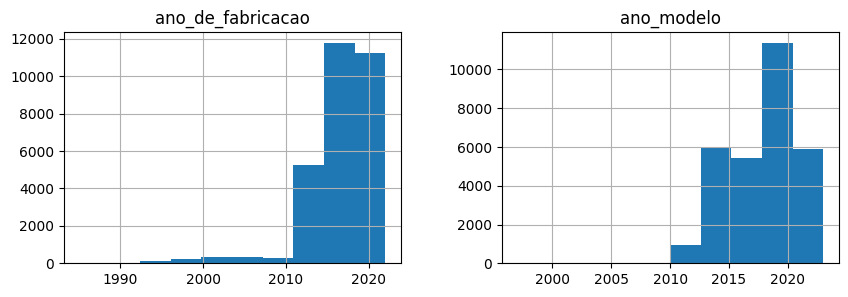

In [21]:
veiculos_usados[['ano_de_fabricacao', 'ano_modelo']].hist(figsize=(10,3))

ano_de_fabricacao       Axes(0.125,0.11;0.352273x0.77)
ano_modelo           Axes(0.547727,0.11;0.352273x0.77)
dtype: object

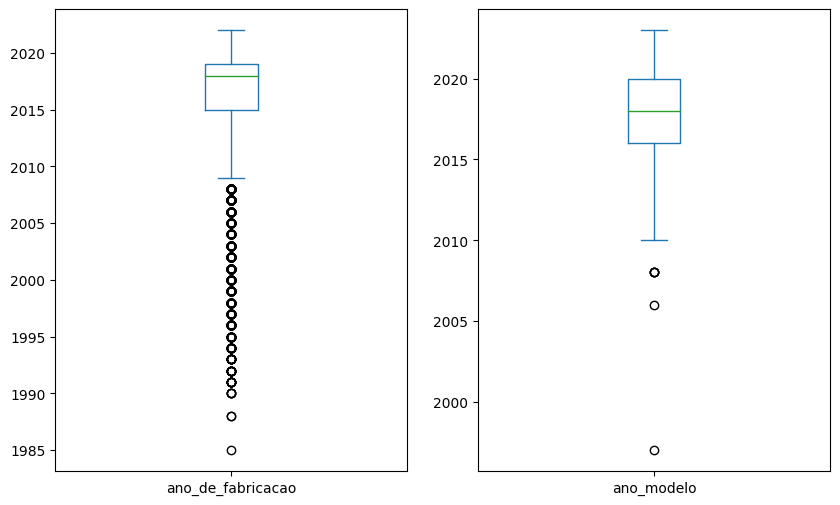

In [22]:
#base.plot(kind='box',figsize=(10,6),subplots=True)
veiculos_usados[['ano_de_fabricacao', 'ano_modelo']].plot(kind='box',figsize=(10,6),subplots=True)

Pode-se observar pelos histogramas e box plot acima que há exemplos com valores inconsistentes. A coluna *ano_de_fabricacao* contém muitos exemplos entre 1985 e 2005, enquanto na coluna *ano_modelo* há poucos registros ou quase nenhum.

Com o objetivo de compreender melhor a relação entre o ano de fabricação e o ano modelo, foi encontrado uma norma criada pela DENATRAN em 2001. A norma explicíta:   "O ano-modelo somente poderá ser imediatamente anterior, igual ou imediatamente posterior ao ano de fabricação do veículo."

Referência: https://www.normasbrasil.com.br/norma/portaria-23-2001_182097.html

Dessa forma, é importante analisar os dados antes de 2001 da coluna ano de fabricação para validar se há exemplos inconsistentes.

In [23]:
veiculos_usados.loc[veiculos_usados.ano_de_fabricacao < 2001]

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
10,8,TOYOTA,FIELDER,1.8 SE-G 16V FLEX 4P AUTOMÁTICO,1996,2012,210099.0,Automática,4,Perua/SW,...,False,False,False,False,False,False,True,True,True,44634.42
34,8,TROLLER,T4,3.0 TETO RÍGIDO 16V TURBO ELETRONIC DIESEL 2P ...,1999,2013,89082.0,Manual,4,Sedã,...,False,False,False,False,False,False,True,False,False,65928.09
111,15,FORD,ECOSPORT,1.6 FREESTYLE 8V FLEX 4P MANUAL,2000,2011,130319.0,Manual,4,Sedã,...,False,False,False,False,False,False,True,False,False,46363.59
174,8,MERCEDES-BENZ,C 180 K,1.6 CLASSIC KOMPRESSOR GASOLINA 4P AUTOMÁTICO,1999,2012,139167.0,Automática,4,Sedã,...,False,False,False,False,False,False,True,True,True,60251.98
178,8,VOLKSWAGEN,NEW BEETLE,2.0 MI 8V GASOLINA 2P TIPTRONIC,1993,2013,154111.0,Automática,4,Hatchback,...,False,False,False,False,False,False,False,True,True,37906.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29233,8,HONDA,CIVIC,1.7 LX 16V GASOLINA 4P AUTOMÁTICO,1997,2012,142764.0,Automática,4,Hatchback,...,False,False,False,True,False,True,True,True,False,30055.38
29341,14,HYUNDAI,I30,2.0 MPFI GLS 16V GASOLINA 4P AUTOMÁTICO,2000,2012,119573.0,Automática,4,Hatchback,...,True,True,False,False,False,False,True,True,True,41362.81
29348,8,HONDA,CRV,2.0 LX 4X2 16V GASOLINA 4P AUTOMÁTICO,1998,2013,112977.0,Automática,4,Sedã,...,False,False,False,True,False,True,False,True,True,55765.97
29428,14,HONDA,CRV,2.0 LX 4X2 16V GASOLINA 4P AUTOMÁTICO,1996,2012,162905.0,Automática,4,Sedã,...,False,False,False,False,False,False,True,False,False,59464.76


É possível confirmar que são valores inconsistentes

A seguir, filtra-se todos os exemplos em que a diferença entre o ano de fabricação e ano modelo são maiores que 1 ano. Resultando em 3288 exemplos.

In [24]:
veiculos_usados.loc[abs(veiculos_usados.ano_modelo - veiculos_usados.ano_de_fabricacao) > 1]

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
3,14,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357.0,Automática,4,Picape,...,True,True,False,False,False,False,True,True,True,123681.36
4,8,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491.0,Automática,4,Utilitário esportivo,...,False,False,False,True,True,True,False,False,False,82419.76
10,8,TOYOTA,FIELDER,1.8 SE-G 16V FLEX 4P AUTOMÁTICO,1996,2012,210099.0,Automática,4,Perua/SW,...,False,False,False,False,False,False,True,True,True,44634.42
11,8,MITSUBISHI,PAJERO TR4,2.0 4X4 16V FLEX 4P MANUAL,2008,2012,116904.0,Manual,4,Sedã,...,False,False,False,False,False,False,True,True,False,62182.82
14,8,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2012,2014,76599.0,Automática,4,Sedã,...,False,False,False,True,False,False,True,True,True,100837.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29529,15,TOYOTA,COROLLA,1.8 XEI 16V FLEX 4P AUTOMÁTICO,2007,2012,134876.0,Automática,4,Sedã,...,False,False,False,False,False,False,True,False,False,60324.29
29549,16,VOLKSWAGEN,SAVEIRO,1.6 CROSS CD 16V FLEX 2P MANUAL,2015,2017,99241.0,Manual,2,Picape,...,False,False,False,False,False,False,True,False,False,79962.84
29565,8,LAND ROVER,RANGE ROVER EVOQUE,2.0 PURE 4WD 16V GASOLINA 4P AUTOMÁTICO,2012,2014,87677.0,Automática,4,Sedã,...,False,False,False,True,False,True,True,True,True,133825.10
29569,8,BMW,320i,2.0 SPORT 16V TURBO ACTIVE FLEX 4P AUTOMÁTICO,2015,2017,80548.0,Automática,4,Sedã,...,False,False,False,True,False,True,True,True,True,122059.65


**Removendo os exemplos inconsistentes**

In [25]:
veiculos_usados = veiculos_usados.loc[abs(veiculos_usados.ano_modelo - veiculos_usados.ano_de_fabricacao) <= 1]

In [26]:
veiculos_usados.shape

(26296, 26)

**Verificando outliers no atributo ano_modelo**

In [27]:
fig = px.box(veiculos_usados, x='ano_modelo')
fig.show()

In [28]:
veiculos_usados[veiculos_usados.ano_modelo <= 2012]

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
245,8,CHEVROLET,CLASSIC,1.0 MPFI LS 8V FLEX 4P MANUAL,2011,2012,116083.0,Manual,4,Hatchback,...,False,False,False,False,False,False,False,True,True,30383.42
425,8,BMW,535i,3.0 SEDAN 6 CILINDROS 24V TURBO GASOLINA 4P AU...,2011,2012,98584.0,Automática,4,Utilitário esportivo,...,False,False,False,False,False,False,True,True,True,72589.34
555,8,AUDI,A1,1.4 TFSI SPORTBACK ATTRACTION 16V 122CV GASOLI...,2012,2012,82964.0,Automática,4,Hatchback,...,False,False,False,True,False,False,False,True,True,76552.79
593,8,CHEVROLET,MALIBU,2.4 LTZ GASOLINA 4P AUTOMÁTICO,2010,2011,103198.0,Automática,4,Sedã,...,False,False,False,False,False,False,True,True,False,73140.51
965,8,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2011,2012,120594.0,Automática,4,Picape,...,False,False,False,False,False,False,True,True,True,140876.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28548,15,HYUNDAI,VELOSTER,1.6 16V GASOLINA 3P AUTOMÁTICO,2011,2011,146251.0,Automática,4,Hatchback,...,False,False,False,False,False,False,True,False,False,52710.57
28835,13,VOLKSWAGEN,CROSSFOX,1.6 MI FLEX 8V 4P MANUAL,2012,2012,95914.0,Manual,4,Hatchback,...,False,False,False,False,False,False,True,False,False,33970.13
29119,20,JAGUAR,XF,3.0 PREMIUM LUXURY V6 24V GASOLINA 4P AUTOMÁTICO,2007,2008,93934.0,Automática,4,Sedã,...,True,True,False,False,False,False,True,True,True,64643.03
29409,8,FORD,KA,1.0 MPI 8V FLEX 2P MANUAL,2010,2011,136367.0,Manual,4,Picape,...,False,False,False,False,False,False,False,True,False,25364.67


**Intervalo Interquartil (IQR)**

O IQR (do inglês, Interquartile Range), é a diferença entre o terceiro e primeiro quartis: IQR = Q3−Q1.

É uma medida de dispersão robusta muito utilizada, por exemplo, quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.

In [29]:
#função para encontrar outliers utilizando o método IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)

    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [30]:
outliers = find_outliers_IQR(veiculos_usados['ano_modelo'])

print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

number of outliers: 174
max outlier value: 2012
min outlier value: 1997


Com o método IQR, é possível observar 174 exemplos com outliers na coluna ano_modelo. Por ser um número pequeno de outliers, optou-se pela remoção desses exemplos.

In [31]:
veiculos_usados = veiculos_usados.loc[veiculos_usados.ano_modelo > 2012]

In [32]:
veiculos_usados.shape

(26122, 26)

**Preços**

Pode-se compreender com os valores mínimos e máximos da coluna Preço que há um intervalo muito grande entre os dois valores.
A frequência dos preços está entre 20000 e 150000 aproximadamente.

Preço mínimo: 14011.65
Preço máximo: 1349747.71


<Axes: ylabel='Frequency'>

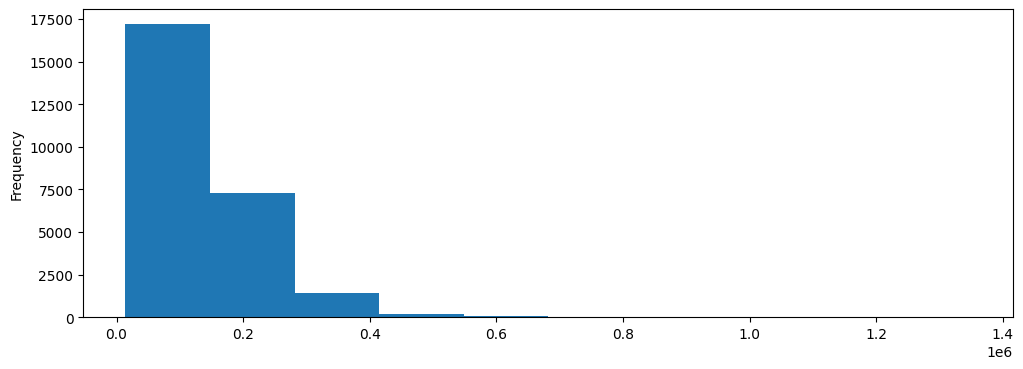

In [33]:
# Mínimo e máximo dos preços
preco_minimo = veiculos_usados.preco.min()
preco_maximo = veiculos_usados.preco.max()
print("Preço mínimo:", preco_minimo)
print("Preço máximo:", preco_maximo)

veiculos_usados['preco'].plot(kind='hist',figsize=(12,4))

In [34]:
veiculos_usados[veiculos_usados.preco > 305000].shape

(1221, 26)

In [35]:
fig = px.box(veiculos_usados, x='preco')
fig.show()

In [36]:
outliers = find_outliers_IQR(veiculos_usados['preco'])

print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

number of outliers: 1284
max outlier value: 1349747.71
min outlier value: 301259.34


**Hodômetro**

A quilometragem mais frequente nos dados está entre 40000 e 80000 km rodados.

Média do hodometro: 53787.38994523882
Desvio padrão dos hodometro: 29193.317101367633


<Axes: ylabel='Frequency'>

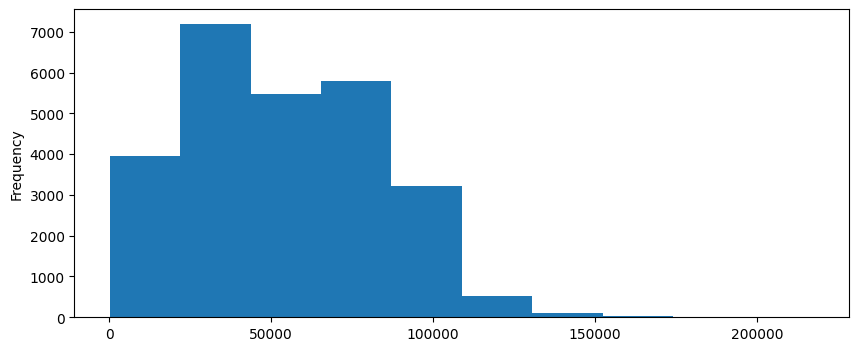

In [30]:
# Média dos anos-modelos
media_hodometro = veiculos_usados.hodometro.mean()
print("Média do hodometro:", media_hodometro)

# Desvio padrão dos anos-modelos
desvio_padrao_hodometro = veiculos_usados.hodometro.std()
print("Desvio padrão dos hodometro:", desvio_padrao_hodometro)

veiculos_usados['hodometro'].plot(kind='hist',figsize=(10,4))

#plt.hist(veiculos_usados.hodometro)

#x = range(0,len(veiculos_usados.hodometro))

#plt.scatter(x,veiculos_usados.hodometro)
#plt.axhline(y=media_hodometro, color='r', linestyle='-')
#plt.show()

In [157]:
fig = px.box(veiculos_usados, x='hodometro')
fig.show()

### Atributos Qualitativos

Os gráficos em barras e os gráfico em setores são comumente usados para exibir distribuições de frequências de variáveis qualitativas.

**Marca e Modelo**

A marca VOLKSWAGEN é a marca mais frequente na base de dados, porém em relação ao modelo do veículo, o modelo COMPASS da marca Jeep é o mais frequente na base de dados.

In [200]:
veiculos_usados['marca'].unique()

array(['NISSAN', 'JEEP', 'KIA', 'HYUNDAI', 'HONDA', 'VOLKSWAGEN',
       'TOYOTA', 'AUDI', 'CITROËN', 'BMW', 'CHEVROLET', 'PORSCHE', 'FORD',
       'MITSUBISHI', 'MERCEDES-BENZ', 'VOLVO', 'LEXUS', 'PEUGEOT', 'FIAT',
       'MINI', 'LAND ROVER', 'CHERY', 'RENAULT', 'TROLLER', 'RAM',
       'JAGUAR', 'SUZUKI', 'MASERATI', 'DODGE', 'SSANGYONG', 'SMART',
       'CHRYSLER', 'SUBARU', 'LIFAN', 'IVECO', 'JAC'], dtype=object)

In [ ]:
veiculos_usados['marca'].value_counts()

moda: 0    VOLKSWAGEN
Name: marca, dtype: object


<Axes: >

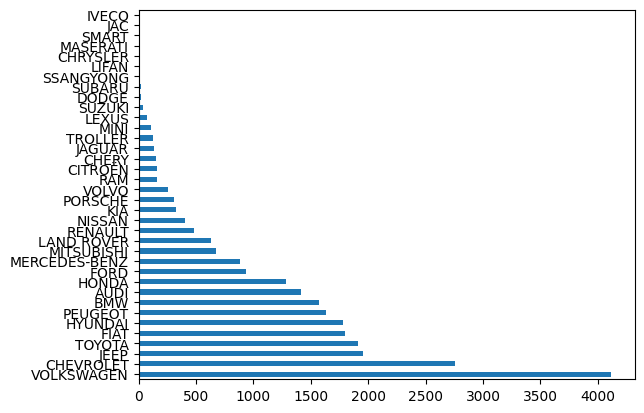

In [37]:
moda_marca = veiculos_usados.marca.mode()
print('moda: '+ str(moda_marca))

marca_value_counts = veiculos_usados['marca'].value_counts()
marca_value_counts.plot.barh()

In [189]:
moda_modelo = veiculos_usados.modelo.mode()
print('moda: '+ str(moda_modelo))

# Aqui podemos observar a quantidade de registros por tipo de marca
separando_por_marca = veiculos_usados.groupby("marca")["modelo"].count()
separando_por_marca.sort_values()


moda: 0    COMPASS
Name: modelo, dtype: object


marca
IVECO               2
JAC                 3
SMART               4
MASERATI            6
LIFAN               8
CHRYSLER            8
SSANGYONG          11
SUBARU             17
DODGE              17
SUZUKI             35
LEXUS              70
MINI              113
TROLLER           123
JAGUAR            130
CHERY             153
CITROËN           158
RAM               165
VOLVO             257
PORSCHE           312
KIA               333
NISSAN            403
RENAULT           483
LAND ROVER        635
MITSUBISHI        692
MERCEDES-BENZ     890
FORD              940
HONDA            1298
AUDI             1418
BMW              1580
PEUGEOT          1636
HYUNDAI          1795
FIAT             1807
TOYOTA           1924
JEEP             1956
CHEVROLET        2770
VOLKSWAGEN       4144
Name: modelo, dtype: int64

**Verificando outliers no atributo Marca**

In [187]:
fig = px.box(veiculos_usados['marca'].value_counts(ascending=True), x='marca')
fig.show()

In [ ]:
veiculos_usados['marca'].value_counts(ascending=True)

**Estado e Cidade**

moda: 0    São Paulo (SP)
Name: estado_vendedor, dtype: object
moda: 0    São Paulo
Name: cidade_vendedor, dtype: object


<Axes: >

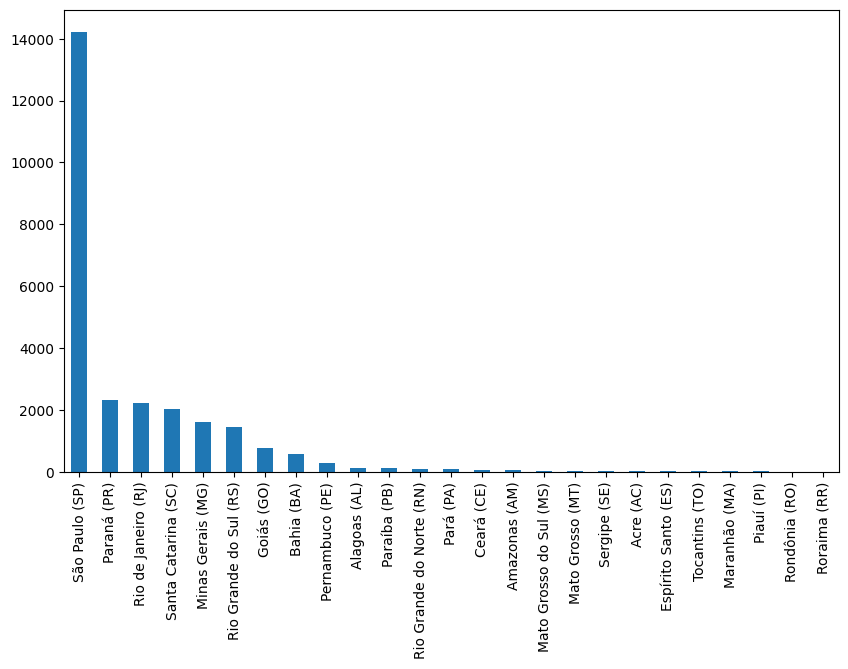

In [38]:
moda_estado = veiculos_usados.estado_vendedor.mode()
print('moda: '+ str(moda_estado))

moda_cidade = veiculos_usados.cidade_vendedor.mode()
print('moda: '+ str(moda_cidade))


veiculos_usados['estado_vendedor'].value_counts().plot(kind='bar', figsize=(10,6))

In [99]:
# Aqui podemos observar a quantidade de registros por tipo de marca
separando_por_estado = veiculos_usados.groupby("estado_vendedor")["cidade_vendedor"].count()
separando_por_estado.sort_values()

estado_vendedor
Roraima (RR)                    2
Rondônia (RO)                   4
Piauí (PI)                      6
Maranhão (MA)                   7
Tocantins (TO)                 20
Espírito Santo (ES)            21
Sergipe (SE)                   24
Acre (AC)                      29
Mato Grosso (MT)               33
Mato Grosso do Sul (MS)        35
Amazonas (AM)                  51
Ceará (CE)                     69
Pará (PA)                      74
Rio Grande do Norte (RN)       90
Paraíba (PB)                  108
Alagoas (AL)                  125
Pernambuco (PE)               318
Bahia (BA)                    604
Goiás (GO)                    789
Rio Grande do Sul (RS)       1646
Minas Gerais (MG)            1775
Santa Catarina (SC)          2302
Paraná (PR)                  2526
Rio de Janeiro (RJ)          2548
São Paulo (SP)              16378
Name: cidade_vendedor, dtype: int64

**Tipo**

moda: 0    Sedã
Name: tipo, dtype: object
Valores únicos: ['Sedã' 'Picape' 'Utilitário esportivo' 'Hatchback' 'Perua/SW' 'Cupê'
 'Minivan']


<Axes: ylabel='tipo'>

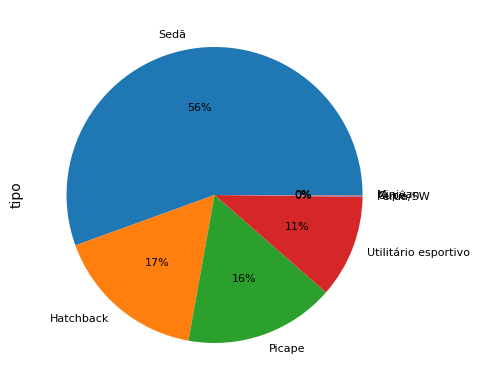

In [139]:
moda_tipo = veiculos_usados.tipo.mode()
print('moda: '+ str(moda_tipo))
print('Valores únicos: ' + str(veiculos_usados['tipo'].unique()))

veiculos_usados['tipo'].value_counts().plot(kind='pie', figsize=(10,4), fontsize=8, autopct='%1.0f%%')

**Cambio**

moda: 0    Automática
Name: cambio, dtype: object


<Axes: >

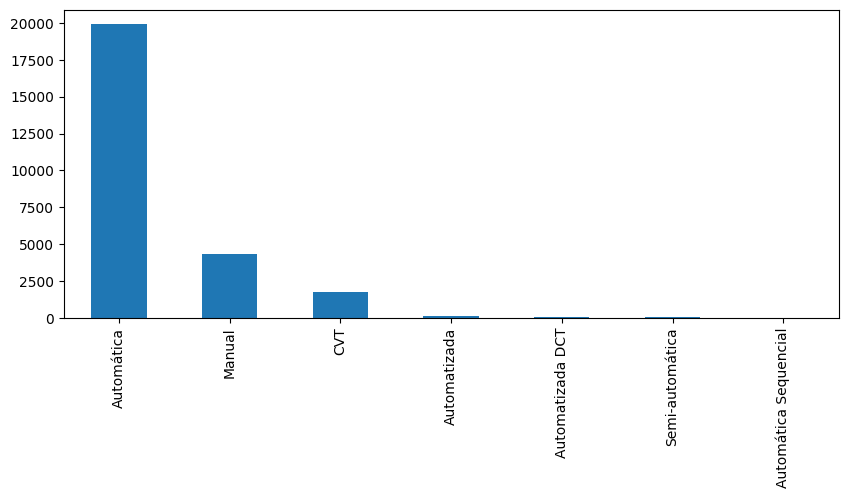

In [39]:
moda_cambio = veiculos_usados.cambio.mode()
print('moda: '+ str(moda_cambio))



veiculos_usados['cambio'].value_counts().plot(kind='bar', figsize=(10,4))

**Cor**

In [135]:
veiculos_usados['cor'].unique()

array(['Branco', 'Preto', 'Prata', 'Cinza', 'Verde', 'Vermelho',
       'Dourado'], dtype=object)

moda: 0    Branco
Name: cor, dtype: object


<Axes: >

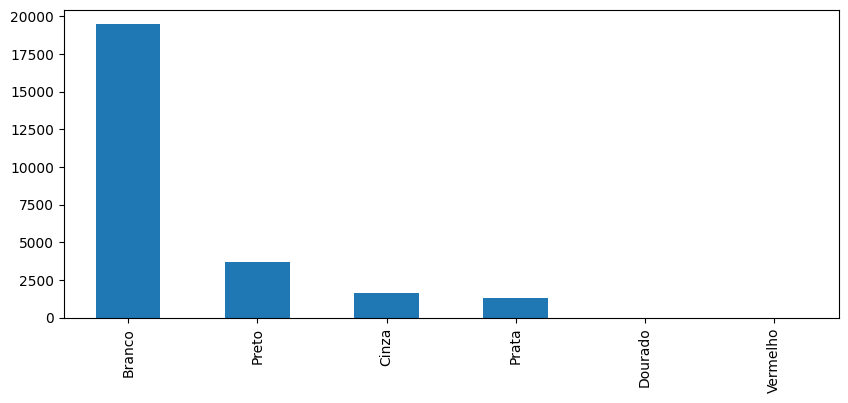

In [40]:
moda_cor = veiculos_usados.cor.mode()
print('moda: '+ str(moda_cor))



veiculos_usados['cor'].value_counts().plot(kind='bar', figsize=(10,4))

**Tipo vendedor**

É possível observar que os exemplos dos atributos tipo vendedor e anunciante são consistentes.

moda: 0    PF
Name: tipo_vendedor, dtype: object


array([<Axes: >], dtype=object)

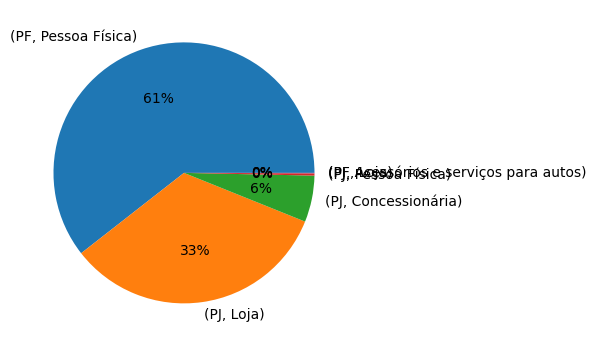

In [132]:
moda_tipo_vendedor = veiculos_usados.tipo_vendedor.mode()
print('moda: '+ str(moda_tipo_vendedor))

veiculos_usados[['tipo_vendedor', 'anunciante']].value_counts().plot.pie(subplots = True, autopct='%1.0f%%', figsize =(6,6))

**Atributos qualitativos booleanos**
- Entrega delivery, Troca, Dono aceita troca, Veículo único dono, Revisões concessionária, Ipva pago, Veículo licenciado, Garantia de fábrica, Revisões dentro agenda

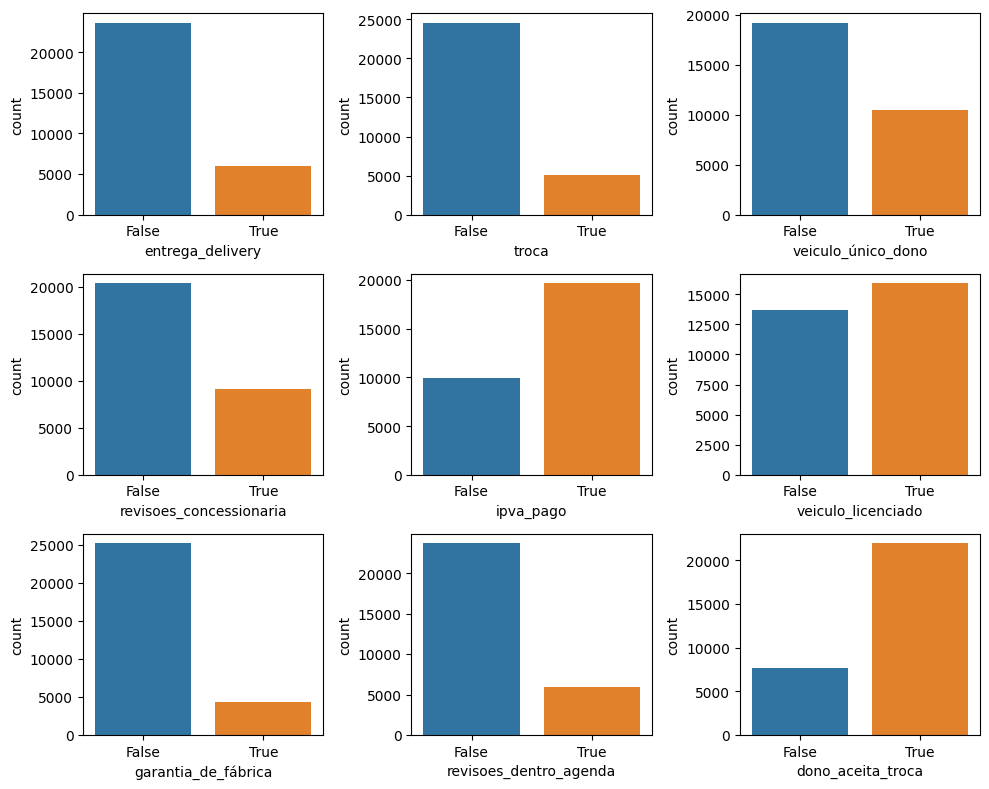

In [153]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 3)

sns.countplot(data = veiculos_usados, x="entrega_delivery", ax=axes[0][0])
sns.countplot(data = veiculos_usados, x="troca", ax=axes[0][1])
sns.countplot(data =veiculos_usados, x="veiculo_único_dono", ax=axes[0][2])
sns.countplot(data = veiculos_usados, x="revisoes_concessionaria", ax=axes[1][0])
sns.countplot(data = veiculos_usados, x="ipva_pago", ax=axes[1][1])
sns.countplot(data = veiculos_usados, x="veiculo_licenciado", ax=axes[1][2])
sns.countplot(data = veiculos_usados, x="garantia_de_fábrica", ax=axes[2][0])
sns.countplot(data = veiculos_usados, x="revisoes_dentro_agenda", ax=axes[2][1])
sns.countplot(data =veiculos_usados, x="dono_aceita_troca", ax=axes[2][2])

plt.show()

In [31]:
veiculos_usados.to_csv('/content/cars_train_estatistico.csv', index=False)